In [3]:
from pymongo import MongoClient
import numpy as np
from numpy.random import randn
import pandas as pd

from pandas import DataFrame, Series
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
client = MongoClient()
dw = client.ecommerceDW


How many customer in certain area that buy from the supermarket?

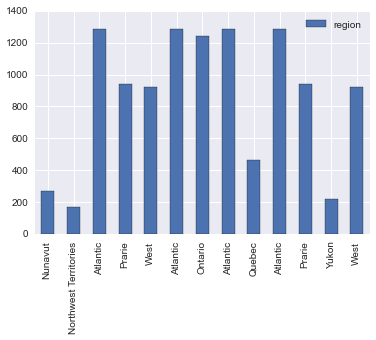

In [4]:
cursor = dw.country.find()

province = [];
region = [];
count = [];
temp = 0;
for document in cursor:
    province.append(document['province'])
    region.append(document['region'])
    #print document['region']
    cursor2 = dw.transaction.aggregate([
            {"$match":{"region":document['region']}},
            {"$group":{"_id":"$transaction_id"}}])
    for document2 in cursor2:
        #print document2
        temp = temp +1
    count.append(temp)
    #print temp
    temp = 0
    
dFrame = DataFrame({'region':pd.Series(count, index=region)})
dFrame.plot(kind='bar');

What day is the most crowded?

Monthly Sales Profit Report

TODO: Now is daily, need to make it monthly

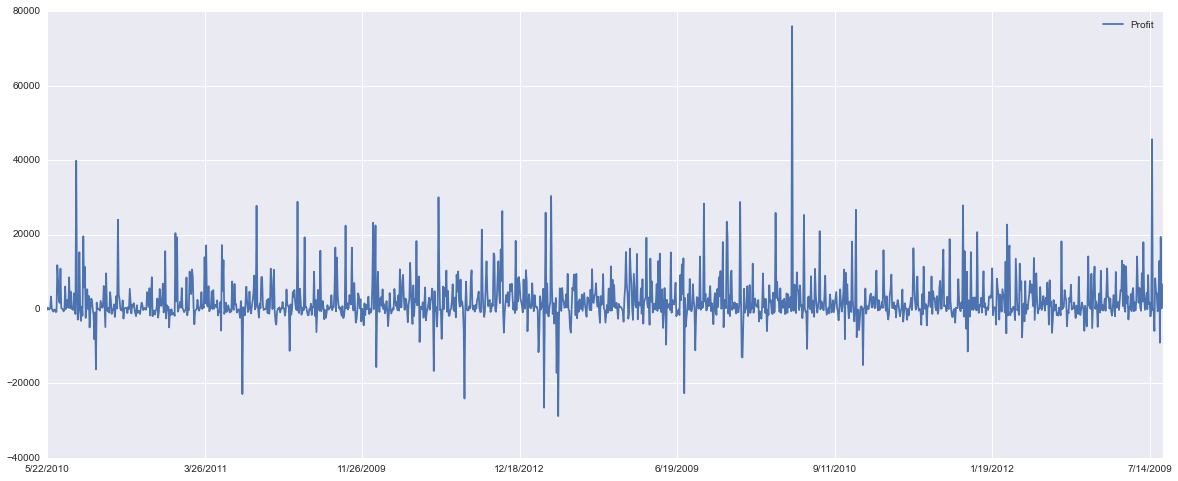

In [6]:
cursor2 = dw.transaction.aggregate([
        {"$group":
         {"_id":"$date","totalProfit":{"$sum":"$profit"}}}
    ])
tanggal = []
profit = []
for document2 in cursor2:
    profit.append(document2['totalProfit'])
    cursor = dw.date.find({"date_key":document2['_id']})
    for document in cursor:
        #print document['full_date'];
        tanggal.append(document['full_date'])
    
dFrame = DataFrame({'Profit':pd.Series(profit, index=tanggal)})
dFrame.plot(kind='line',figsize=(20,8));